In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\HSH'

In [3]:
df = pd.read_csv('./Desktop/machine-learning-master/data/csv/basketball_stat.csv')

In [4]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
df['Pos'].value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'STL and 2P in 2d plane')

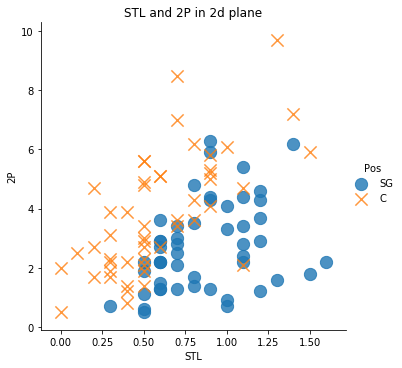

In [7]:
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
          scatter_kws={'s':150}, #좌표상의 점의 크기
          markers=['o', 'x'],
          hue='Pos') # 예측값
plt.title('STL and 2P in 2d plane')

Text(0.5, 1, 'BLK and 3P in 2d plane')

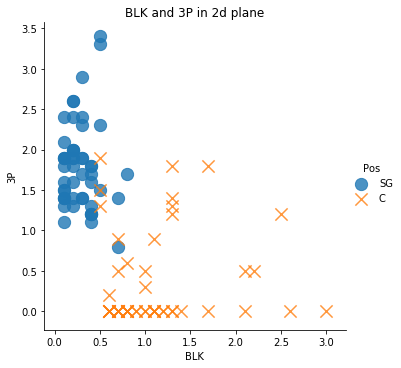

In [8]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
          scatter_kws={'s':150}, #좌표상의 점의 크기
          markers=['o', 'x'],
          hue='Pos') # 예측값
plt.title('BLK and 3P in 2d plane')

In [9]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [10]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df, test_size=0.2)

In [13]:
train.shape, test.shape

((80, 5), (20, 5))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = [i for i in range(3, max_k_range, 2)]

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
print(cross_validation_scores)

[0.9125, 0.925, 0.925, 0.925, 0.9125, 0.9125, 0.9125, 0.9125, 0.9, 0.875, 0.875, 0.875, 0.85, 0.8375, 0.8375, 0.8375, 0.8375, 0.8375, 0.7875]


Text(0, 0.5, 'Accuracy')

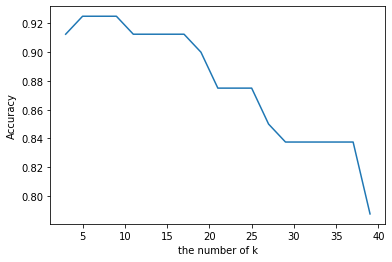

In [15]:
# k에 따른 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')

In [16]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print(f"The best number of k : {k}")

The best number of k : 5


In [17]:
knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# kNN 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score

# 모델 예측 정확도(accuracy) 출력
print(f"accuracy: {accuracy_score(y_test.values.ravel(), pred)}")

accuracy: 0.85


In [20]:
comparison = pd.DataFrame({
    'prediction': pred,
    'ground_truth': y_test.values.ravel()
})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,C,C
3,SG,SG
4,C,C
5,C,SG
6,SG,SG
7,C,C
8,C,C
9,C,C
